# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
<a id='intro'></a>

## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
    1-The director with most movies
    2-The movie with maximum budget
    3-The movie with minimum budget
    4-The relationship between budget and revenue
    5-The genre with most movies
    6-The year with most movie releases

In [2]:
# here I am importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### Read data

In [3]:
# here I am loading the data and printing 5 rows and 21 columns to check the data is read
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### View number of rows and columns

In [4]:
# here I am viewing the number of rows and columns
df.shape

(10866, 21)

### View basic information

In [5]:
# here I am viewing basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### See dataset distribution

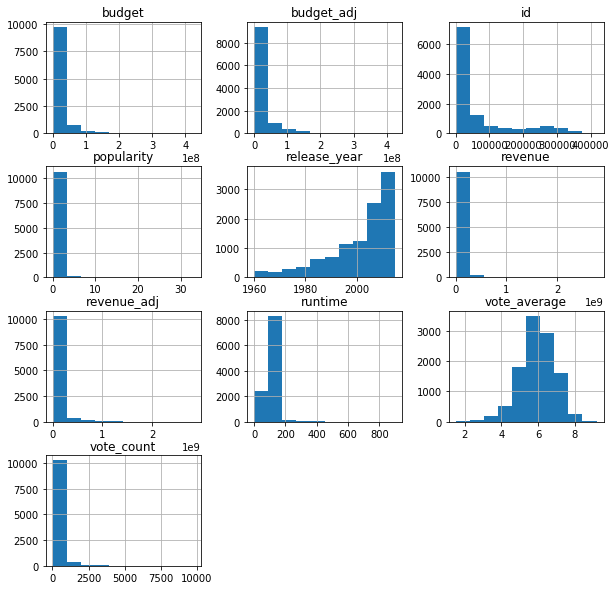

In [6]:
# here I am looking at the dataset distribution
df.hist(figsize = (10, 10));

# Data cleaning

### Check null values

In [7]:
# here I am checking columns which contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Fill null values with 0

In [8]:
# here I am filling the null values with 0
fill=df.fillna(0)

### Count duplicated rows

In [9]:
# here I am counting duplicated rows
df.duplicated().sum()

1

### Delete duplicated rows

In [10]:
# here I am deleting duplicated rows
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
# here I am counting the number of distinct elements
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [13]:
# here I am generating descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### View columns

In [14]:
# here I am viewing columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Remove unused columns

In [15]:
# here I am removing the columns I am not going to use
df.drop(['id', 'imdb_id', 'popularity',
       'cast', 'homepage', 'tagline', 'keywords', 'overview',
       'runtime','production_companies', 'release_date',
       'vote_count', 'vote_average', 'budget_adj',
       'revenue_adj'],axis =1,inplace = True)

In [16]:
# here I am checking the deleted ones
df.head(1)

,budget,revenue,original_title,director,genres,release_year
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015


### Search for missing information

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 6 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
director          10821 non-null object
genres            10842 non-null object
release_year      10865 non-null int64
dtypes: int64(3), object(3)
memory usage: 594.2+ KB


### 44 movies are missing director information and 23 movies are missing genre information. Remove these movies from the dataset 

In [18]:
df.dropna(axis = 0, inplace = True, subset = ['director','genres'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 6 columns):
budget            10800 non-null int64
revenue           10800 non-null int64
original_title    10800 non-null object
director          10800 non-null object
genres            10800 non-null object
release_year      10800 non-null int64
dtypes: int64(3), object(3)
memory usage: 590.6+ KB


In [20]:
# here I am looking at the data type of each column
df.dtypes

budget             int64
revenue            int64
original_title    object
director          object
genres            object
release_year       int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (The director with most movies)

In [21]:
# here I am displaying the director with the most movies
df['director'].value_counts().head(n=5)

Woody Allen         45
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     29
Ridley Scott        23
Name: director, dtype: int64

#### Answer: Woody Allen- 45 movies

### Create visualization to show directors and number of released movies

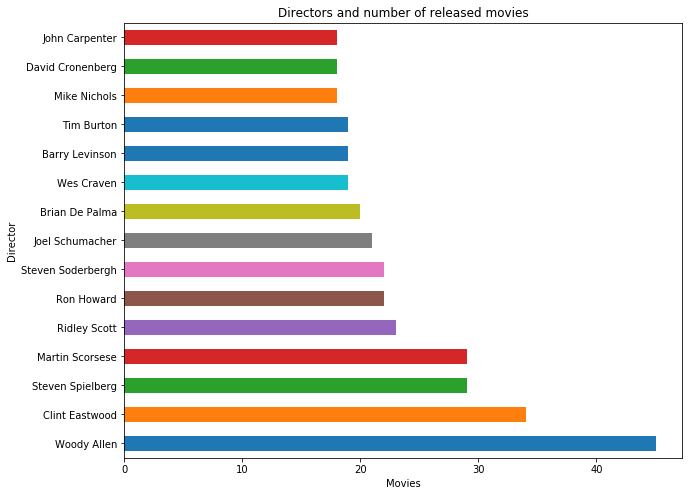

In [22]:
df.groupby('director')['director'].count().sort_values(ascending=False).head(15).plot(kind='barh',figsize=(10,8))
plt.xlabel('Movies')
plt.ylabel('Director')
plt.title('Directors and number of released movies');

#### From the above visualization we can see that Woody Allen dominates by 45 movies followed by Clint Eastwood and Steven Spielberg

### Research Question 2  (The movie with maximum budget)

In [23]:
# here I am creating a function maximum 
def maximum(a):
# and here I am using idxmax() to find the index of the maximum budget movie
    aa = df[a].idxmax()
    high = pd.DataFrame(df.loc[aa,:])  
# here I am printing the movie with the maximum budget
    print("Maximum "+ a + " movie: ",df['original_title'][aa])

In [24]:
df['budget'] = df['budget'].replace(0,np.NAN)
maximum('budget')

Maximum budget movie:  The Warrior's Way


#### Answer: The Warrior's Way

### Research Question 3  (The movie with minimum budget)

In [25]:
# here I am creating a function minimum 
def minimum(b):
# and here I am using idxmin() to find the index of the minimum budget movie
    bb = df[b].idxmin()
    low = pd.DataFrame(df.loc[bb,:]) 
# here I am printing the movie with the minimum budget
    print("Minimum "+ b + " movie: ",df['original_title'][bb])

In [26]:
df['budget'] = df['budget'].replace(0,np.NAN)
minimum('budget')

Minimum budget movie:  Fear Clinic


#### Answer: Fear Clinic

### Research Question 4  (The relationship between budget and revenue)

In [27]:
# here I am creating a function relation 
def relation(feature):
    df.boxplot(feature, vert=False,showfliers=False)

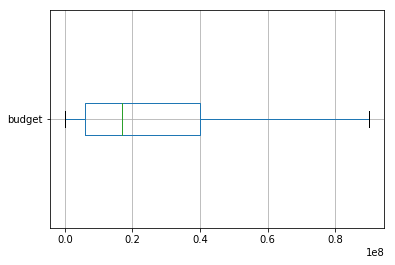

In [28]:
# here I am visualizing the distribution of budget 
relation('budget')

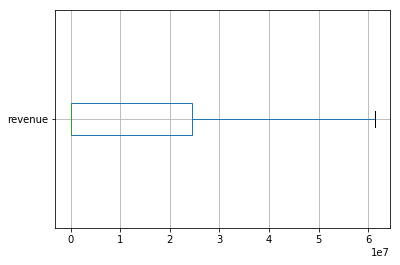

In [29]:
# here I am visualizing the distribution of revenue 
relation('revenue')

### Relationship between Budget and Revenue



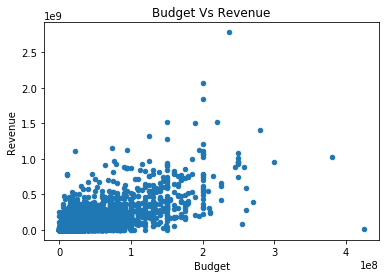

In [30]:
# here I am plotting Budget and Revenue scatter plot
df.plot(x='budget',y='revenue',kind='scatter')
plt.title('Budget Vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue');

#### From the above visualization we can see that Revenue increases with an increase in Budget.

### Research Question 5  (The genre with most movies)

In [31]:
# here I am displaying the genre with the most movies
df['genres'].value_counts().head(n=5)

Drama            711
Comedy           707
Documentary      306
Drama|Romance    289
Comedy|Drama     280
Name: genres, dtype: int64

#### Answer: Drama- 711 movies

### Create visualization to show genre with most movies

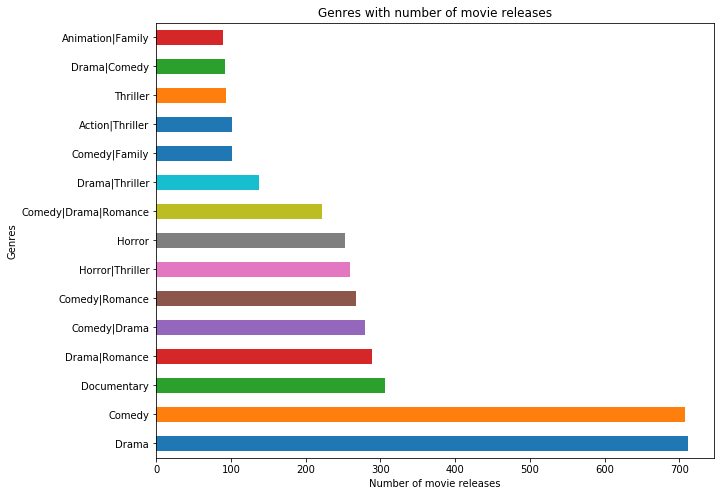

In [32]:
df.groupby('genres')['genres'].count().sort_values(ascending=False).head(15).plot(kind='barh',figsize=(10,8))
plt.xlabel('Number of movie releases')
plt.ylabel('Genres')
plt.title('Genres with number of movie releases');

#### From the above visualization we can see that Drama dominates by 711 followed by Comedy and Documentary

### Research Question 6  (The year with most movie releases)

In [33]:
# here I am displaying the year with the most movie releases
df['release_year'].value_counts().head(n=5)

2014    694
2013    652
2015    624
2012    581
2011    539
Name: release_year, dtype: int64

#### Answer: 2014- 694 movies

### Create visualization to show years and number of released movies

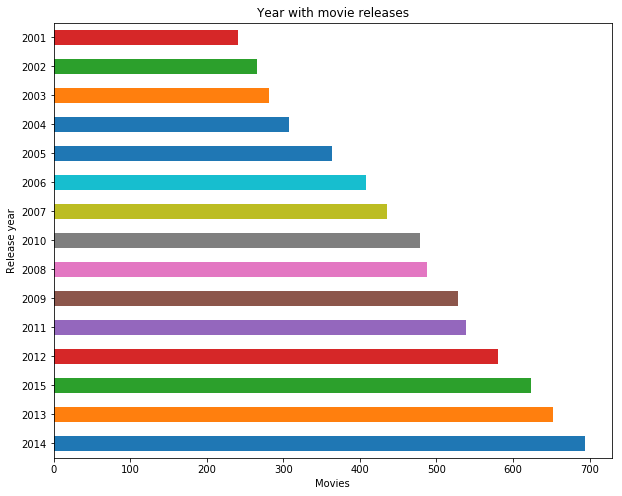

In [34]:
df.groupby('release_year')['release_year'].count().sort_values(ascending=False).head(15).plot(kind='barh',figsize=(10,8))
plt.xlabel('Movies')
plt.ylabel('Release year')
plt.title('Year with movie releases');

#### From the above visualization we can see that 2014 dominates by 694 followed by 2013 and 2015

<a id='conclusions'></a>
## Conclusions
    1-Woody Allen is a director with most movies
    2-The Warrior's Way is the movie with maximum budget
    3-Fear Clinic is the movie with minimum budget
    4-Revenue increases with an increase in budget
    5-Drama is the genre with most movies
    6-2014 is the year with most movie releases
## Limitations: 
    1-Uncertain whether the dataset is current.

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0